In [1]:
import nltk
import urllib.request
import math
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import numpy as np

In [2]:
text = open('White_Fang.txt','r').read().lower()
text = text.replace('--',' ')
text = text.replace('.','')
text = text.replace(',','')
print(text[:1731])

ď»żwhite fang


part i


chapter i the trail of the meat


dark spruce forest frowned on either side the frozen waterway  the trees
had been stripped by a recent wind of their white covering of frost and
they seemed to lean towards each other black and ominous in the fading
light  a vast silence reigned over the land  the land itself was a
desolation lifeless without movement so lone and cold that the spirit
of it was not even that of sadness  there was a hint in it of laughter
but of a laughter more terrible than any sadness a laughter that was
mirthless as the smile of the sphinx a laughter cold as the frost and
partaking of the grimness of infallibility  it was the masterful and
incommunicable wisdom of eternity laughing at the futility of life and
the effort of life  it was the wild the savage frozen-hearted
northland wild

but there _was_ life abroad in the land and defiant  down the frozen
waterway toiled a string of wolfish dogs  their bristly fur was rimed
with frost  their bre

In [3]:
raws = text.split('\n')
print(raws[0:20])

['ď»żwhite fang', '', '', 'part i', '', '', 'chapter i the trail of the meat', '', '', 'dark spruce forest frowned on either side the frozen waterway  the trees', 'had been stripped by a recent wind of their white covering of frost and', 'they seemed to lean towards each other black and ominous in the fading', 'light  a vast silence reigned over the land  the land itself was a', 'desolation lifeless without movement so lone and cold that the spirit', 'of it was not even that of sadness  there was a hint in it of laughter', 'but of a laughter more terrible than any sadness a laughter that was', 'mirthless as the smile of the sphinx a laughter cold as the frost and', 'partaking of the grimness of infallibility  it was the masterful and', 'incommunicable wisdom of eternity laughing at the futility of life and', 'the effort of life  it was the wild the savage frozen-hearted']


In [4]:
sw = stopwords.words('english')
pos = open('positive-words.txt','r').read().split()
neg = open('negative-words.txt','r').read().split()

In [5]:
#remowing plank raws
for raw in raws :
    if raw == '':
        raws.remove(raw)

#The rest of text processing takes place inside the for loop
# x variable is only to limit ammount of printed raws
x=0
score = [None] * len(raws)
for raw in raws:
    #spliting each raw to separate words
    tokens = raw.split()
    
    #remowing stopwords
    atokens = tokens[:]
    btokens = tokens[:]
    for token in atokens:
        if token in sw:
            btokens.remove(token)
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    for i in range(len(btokens)):
        btokens[i] = lemmatizer.lemmatize(btokens[i])
    #sentiment score
    p=0
    n=0
    for i in range(len(btokens)):
        if btokens[i] in pos:
            p = p + 1
        elif btokens[i] in neg:
            n = n + 1
    score[x] = p-n
    
    if x < 10 :
        print("%80s %5d" % (raw, score[x]))
    x = x+1

                                                                   ď»żwhite fang     0
                                                                          part i     0
                                                 chapter i the trail of the meat     0
        dark spruce forest frowned on either side the frozen waterway  the trees    -2
         had been stripped by a recent wind of their white covering of frost and    -1
          they seemed to lean towards each other black and ominous in the fading     0
              light  a vast silence reigned over the land  the land itself was a     0
           desolation lifeless without movement so lone and cold that the spirit    -4
          of it was not even that of sadness  there was a hint in it of laughter    -1
            but of a laughter more terrible than any sadness a laughter that was    -2


In [6]:
mean = [None]*len(score)
window = 100
for i in range(int(window/2),len(score)-int(window/2)):
    s=0
    for t in range(i-int(window/2),i+int(window/2)):
        s = s + score[t]
    mean[i] = s/window

In [7]:
import matplotlib.pyplot as plt

window size 100


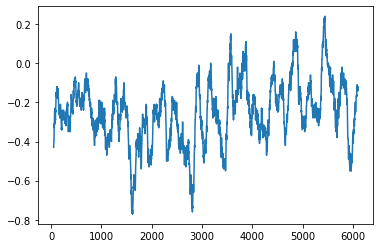

In [8]:
print('window size 100')
x = np.arange(len(mean))
plt.plot(x,mean)
plt.show()

window size 50


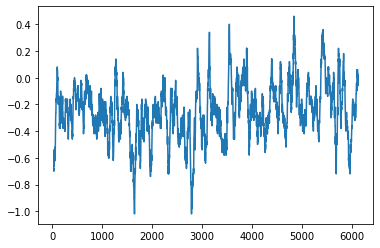

In [9]:
mean = [None]*len(score)
window = 50
for i in range(int(window/2),len(score)-int(window/2)):
    s=0
    for t in range(i-int(window/2),i+int(window/2)):
        s = s + score[t]
    mean[i] = s/window
print('window size 50')
x = np.arange(len(mean))
plt.plot(x,mean)
plt.show()

&nbsp;The plots shows us that in the book in general there is more negative words than positive. The mood varies a lot in short periods quite randomly but in most of cases it is below 0. Starting from about half of the book the mood seems to be more positive. There is more values obowe 0. Above 5500 the plots decrease but finaly it go up above zero.

The sentiment analysis reflects my personal feeling while reading this book.